In [150]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [151]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [3]:
data_forearm = pd.read_csv('/content/gdrive/MyDrive/EMG/Forearm.csv', header = None)
columns_forearm = ['Participant', 'Gesture']
for i in range(1,17):
  for j in range(1,7):
    columns_forearm.append(f'F{i}_{j}')

#columns
data_forearm.columns = columns_forearm
data_forearm

ParserError: ignored

In [ ]:
data_forearm

In [ ]:
for i in range(1,17):
  X = data_forearm[data_forearm['Gesture'] == i].drop(['Participant', 'Gesture'], axis = 1)
  y = data_forearm[data_forearm['Gesture'] == i]['Participant']

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify = y)

  lr_model = LogisticRegression(max_iter=2000, random_state=42)
  lr_model.fit(X_train, y_train)
  y_pred = lr_model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  report = classification_report(y_test, y_pred)
  print(f'Gesture {i}')
  print(f'Accuracy: {accuracy*100:.2f}%')
  print(report)

In [ ]:
data_wrist = pd.read_csv('/content/gdrive/MyDrive/EMG/Wrist.csv', header = None)
columns_wrist = ['Participant', 'Gesture']
for i in range(1,13):
  for j in range(1,7):
    columns_wrist.append(f'W{i}_{j}')

#columns
data_wrist.columns = columns_wrist
data_wrist.head()

,Participant,Gesture,W1_1,W1_2,W1_3,W1_4,W1_5,W1_6,W2_1,W2_2,...,W11_3,W11_4,W11_5,W11_6,W12_1,W12_2,W12_3,W12_4,W12_5,W12_6
0,1,1,2.922575,2.778635,2.339749,1.727899,1.434364,0.915000,3.233603,2.814585,...,1.883277,1.710328,1.223964,0.933255,2.734054,2.080262,1.618242,1.486598,0.688730,0.401528
1,1,1,2.908093,2.861089,2.158461,1.888379,1.427683,0.832186,3.103298,2.656516,...,2.151844,1.590148,0.935341,0.918269,2.492258,2.190547,1.657349,1.442303,0.798592,0.312742
2,1,1,2.840419,2.797812,2.191910,1.533328,1.390833,0.877053,3.030690,2.787796,...,1.710746,1.465138,1.348585,0.754941,2.562364,2.049576,1.288337,1.101940,0.824831,0.476688
3,1,1,2.650479,2.600447,2.049724,1.609441,1.195938,0.761170,2.730067,2.725836,...,1.721995,1.540449,1.023915,0.587505,2.241784,1.872230,1.369887,1.054012,0.754820,0.490641
4,1,1,2.595917,2.458341,1.918305,1.655870,1.270746,0.901638,2.663474,2.471136,...,1.696632,1.335274,1.117872,0.924680,2.244467,2.037483,1.598419,1.211382,0.768694,0.286040


In [ ]:
for i in range(1,17):
  X = data_wrist[data_wrist['Gesture'] == i].drop(['Participant', 'Gesture'], axis = 1)
  y = data_wrist[data_wrist['Gesture'] == i]['Participant']

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

  lr_model = LogisticRegression(max_iter=2000, random_state=42)
  lr_model.fit(X_train, y_train)
  y_pred = lr_model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  report = classification_report(y_test, y_pred)
  print(f'Gesture {i}')
  print(f'Accuracy: {accuracy*100:.2f}%')
  print(report)

In [ ]:
data = data_forearm.join(data_wrist.drop(['Participant', 'Gesture'], axis = 1))
data

,Participant,Gesture,F1_1,F1_2,F1_3,F1_4,F1_5,F1_6,F2_1,F2_2,...,W11_3,W11_4,W11_5,W11_6,W12_1,W12_2,W12_3,W12_4,W12_5,W12_6
0,1,1,3.110324,2.841973,1.908858,2.014165,1.602503,0.993396,3.452033,3.106476,...,1.883277,1.710328,1.223964,0.933255,2.734054,2.080262,1.618242,1.486598,0.688730,0.401528
1,1,1,2.816928,2.795840,2.235993,2.080250,1.588518,1.147142,3.272871,2.817789,...,2.151844,1.590148,0.935341,0.918269,2.492258,2.190547,1.657349,1.442303,0.798592,0.312742
2,1,1,2.935225,2.984728,2.074351,2.136033,1.704614,0.938229,3.339320,2.920882,...,1.710746,1.465138,1.348585,0.754941,2.562364,2.049576,1.288337,1.101940,0.824831,0.476688
3,1,1,2.786248,2.782894,1.923398,1.774108,1.374999,0.828680,3.003595,2.946545,...,1.721995,1.540449,1.023915,0.587505,2.241784,1.872230,1.369887,1.054012,0.754820,0.490641
4,1,1,2.919923,2.854799,2.004705,1.777750,1.382135,0.941564,2.943566,2.840734,...,1.696632,1.335274,1.117872,0.924680,2.244467,2.037483,1.598419,1.211382,0.768694,0.286040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160299,43,16,2.816327,2.764134,2.368049,1.718601,1.397329,1.231057,3.271536,2.712857,...,1.513869,0.876110,0.675145,0.453474,1.826866,2.416115,2.809714,2.708524,1.452124,1.257598
160300,43,16,2.664659,2.626768,2.261596,1.727659,1.619177,0.934676,3.042100,2.758969,...,1.429659,0.985747,0.756872,0.303942,2.043940,2.646239,2.864388,2.820418,1.752245,1.052750
160301,43,16,2.787210,2.836051,2.147853,1.879788,1.650287,1.232707,3.245224,2.948184,...,1.609177,1.002618,0.555227,0.195959,2.374594,2.278151,2.676630,2.882460,1.764560,1.206579
160302,43,16,2.697589,2.741219,2.019826,1.890060,1.411307,1.382210,3.026319,2.747694,...,1.479051,1.045452,0.552351,0.325200,2.185957,2.349187,2.842910,2.719140,1.613999,1.212050


In [ ]:
data.to_csv('/content/gdrive/MyDrive/EMG/final_data.csv')

In [152]:
data = pd.read_csv('/content/gdrive/MyDrive/EMG/final_data.csv')

In [ ]:
for i in range(1,17):
  X = data[data['Gesture'] == i].drop(['Participant', 'Gesture'], axis = 1)
  y = data[data['Gesture'] == i]['Participant']

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

  lr_model = LogisticRegression(max_iter=2000, random_state=42)
  lr_model.fit(X_train, y_train)
  y_pred = lr_model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  report = classification_report(y_test, y_pred)
  print(f'Gesture {i}')
  print(f'Accuracy: {accuracy*100:.2f}%')
  print(report)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = data.drop(['Participant', 'Gesture'], axis = 1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

num_clusters = 43
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_indices = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
n_components = 2
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(X)

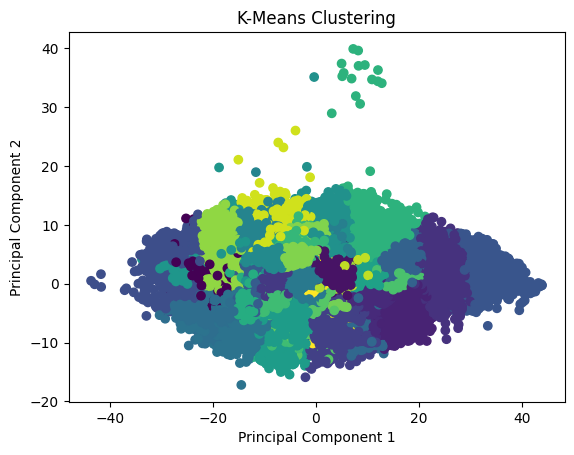

In [ ]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_indices)
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
X = data.iloc[0:,2:]

In [ ]:
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion')
plt.show()

In [ ]:
# xd = data[(data['Gesture']==1)]
# xd = xd[xd['Participant']<15]

#Authentication

In [ ]:
auth = []
for i in range(len(data)):
  if data.iloc[i]['Participant'] < 40:
    auth.append(1)
  else:
    auth.append(0)

In [235]:
X_dat = data.drop(['Gesture','Participant'], axis = 1)
X_dat

,Unnamed: 0,F1_1,F1_2,F1_3,F1_4,F1_5,F1_6,F2_1,F2_2,F2_3,...,W11_3,W11_4,W11_5,W11_6,W12_1,W12_2,W12_3,W12_4,W12_5,W12_6
0,0,3.110324,2.841973,1.908858,2.014165,1.602503,0.993396,3.452033,3.106476,2.132478,...,1.883277,1.710328,1.223964,0.933255,2.734054,2.080262,1.618242,1.486598,0.688730,0.401528
1,1,2.816928,2.795840,2.235993,2.080250,1.588518,1.147142,3.272871,2.817789,2.106691,...,2.151844,1.590148,0.935341,0.918269,2.492258,2.190547,1.657349,1.442303,0.798592,0.312742
2,2,2.935225,2.984728,2.074351,2.136033,1.704614,0.938229,3.339320,2.920882,2.121795,...,1.710746,1.465138,1.348585,0.754941,2.562364,2.049576,1.288337,1.101940,0.824831,0.476688
3,3,2.786248,2.782894,1.923398,1.774108,1.374999,0.828680,3.003595,2.946545,2.192277,...,1.721995,1.540449,1.023915,0.587505,2.241784,1.872230,1.369887,1.054012,0.754820,0.490641
4,4,2.919923,2.854799,2.004705,1.777750,1.382135,0.941564,2.943566,2.840734,2.172270,...,1.696632,1.335274,1.117872,0.924680,2.244467,2.037483,1.598419,1.211382,0.768694,0.286040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160299,160299,2.816327,2.764134,2.368049,1.718601,1.397329,1.231057,3.271536,2.712857,2.625555,...,1.513869,0.876110,0.675145,0.453474,1.826866,2.416115,2.809714,2.708524,1.452124,1.257598
160300,160300,2.664659,2.626768,2.261596,1.727659,1.619177,0.934676,3.042100,2.758969,2.341884,...,1.429659,0.985747,0.756872,0.303942,2.043940,2.646239,2.864388,2.820418,1.752245,1.052750
160301,160301,2.787210,2.836051,2.147853,1.879788,1.650287,1.232707,3.245224,2.948184,2.221615,...,1.609177,1.002618,0.555227,0.195959,2.374594,2.278151,2.676630,2.882460,1.764560,1.206579
160302,160302,2.697589,2.741219,2.019826,1.890060,1.411307,1.382210,3.026319,2.747694,2.410361,...,1.479051,1.045452,0.552351,0.325200,2.185957,2.349187,2.842910,2.719140,1.613999,1.212050


In [236]:
scaler = StandardScaler()
X_dat = scaler.fit_transform(X_dat.iloc[0:, 1:])
X_dat1 = pd.DataFrame(X_dat)
X_dat1['auth'] = auth

In [237]:
X_dat1['auth'].value_counts()

1    145392
0     14912
Name: auth, dtype: int64

In [241]:
from imblearn.over_sampling import SMOTE

X = X_dat1.iloc[0:,:-1]
y = X_dat1.iloc[0:,-1]

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [242]:
y.value_counts()

1    145392
0    145392
Name: auth, dtype: int64

In [ ]:
X

In [250]:
sequence_length = 233

# X = []
# y = []

# for i in range(len(X_dat) - sequence_length):
#     X.append(X_dat.iloc[i:i+sequence_length, 2:])
#     y.append(X_dat.iloc[i+sequence_length, 1])

# X = np.array(X)
# y = np.array(y) - 1

# from keras.utils import to_categorical
# y = to_categorical(y)

# print(X.shape, y.shape)

batch_size = 233
X_batches = []
y_batches = []

for i in range(0, len(X) - sequence_length + 1, batch_size):
    X_batch = X.iloc[i:i+sequence_length]
    y_batch = y.iloc[i]

    X_batches.append(X_batch)
    y_batches.append(y_batch)

from keras.utils import to_categorical
y_batches = np.array(y_batches)
y_batches = to_categorical(y_batches)
# Convert lists to numpy arrays if needed
X_batches = np.array(X_batches)

In [251]:
print(X_batches.shape, y_batches.shape)

(1248, 233, 168) (1248, 2)


In [252]:
y_batches

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [253]:
X_batches

array([[[ 1.0021074 ,  0.75863172, -0.02416647, ..., -0.28049795,
         -0.82155661, -0.77314527],
        [ 0.48654638,  0.68345099,  0.49310361, ..., -0.33931003,
         -0.6677539 , -0.89951772],
        [ 0.69442038,  0.9912724 ,  0.2375137 , ..., -0.79122651,
         -0.63102054, -0.66616752],
        ...,
        [-0.79606005, -0.91754597, -0.91916912, ..., -1.62720748,
         -1.31585323, -1.9418663 ],
        [-0.62642243, -0.98771749, -0.75708741, ..., -1.87038835,
         -1.81299038, -2.02989907],
        [-0.21871076, -0.59184329, -0.69761563, ..., -1.47136873,
         -1.88608557, -1.97832412]],

       [[-1.51566833, -0.6229202 , -0.33762674, ..., -0.07404207,
         -0.27297218, -0.19034722],
        [-1.28649983, -0.69742411, -0.64728395, ..., -0.11180669,
         -0.37090569, -0.5199991 ],
        [-1.30422828, -0.97907515, -1.06287358, ..., -0.31641305,
         -0.27475174, -0.29717278],
        ...,
        [-1.27437549, -0.719631  , -0.75065014, ...,  

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X_batches, y_batches, test_size=0.3, random_state = 42, stratify = y_batches)

In [259]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(233, 168),activation="sigmoid",return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32,activation="sigmoid"))
model.add(Dropout(0.2))
model.add(Dense(2, activation='sigmoid'))
# Use categorical crossentropy for multi-class classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_69 (LSTM)              (None, 233, 64)           59648     
                                                                 
 dropout_66 (Dropout)        (None, 233, 64)           0         
                                                                 
 lstm_70 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_67 (Dropout)        (None, 32)                0         
                                                                 
 dense_35 (Dense)            (None, 2)                 66        
                                                                 
Total params: 72130 (281.76 KB)
Trainable params: 72130 (281.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [260]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
28/28 [==============================] - 71s 408ms/step - loss: 0.7008 - accuracy: 0.5223 - val_loss: 0.6686 - val_accuracy: 0.6373
Epoch 2/10
28/28 [==============================] - 8s 275ms/step - loss: 0.6470 - accuracy: 0.6804 - val_loss: 0.5938 - val_accuracy: 0.8987
Epoch 3/10
28/28 [==============================] - 11s 385ms/step - loss: 0.5222 - accuracy: 0.8580 - val_loss: 0.3999 - val_accuracy: 0.9093
Epoch 4/10
28/28 [==============================] - 10s 344ms/step - loss: 0.3222 - accuracy: 0.9255 - val_loss: 0.2197 - val_accuracy: 0.9440
Epoch 5/10
28/28 [==============================] - 9s 309ms/step - loss: 0.1960 - accuracy: 0.9565 - val_loss: 0.1512 - val_accuracy: 0.9627
Epoch 6/10
28/28 [==============================] - 9s 329ms/step - loss: 0.1487 - accuracy: 0.9645 - val_loss: 0.1567 - val_accuracy: 0.9520
Epoch 7/10
28/28 [==============================] - 9s 330ms/step - loss: 0.1264 - accuracy: 0.9725 - val_loss: 0.1577 - val_accuracy: 0.9547
Epo

In [261]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

confusion_mtx = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print(confusion_mtx)

# Additional metrics
report = classification_report(y_test, y_pred)
print(report)

12/12 [==============================] - 2s 132ms/step
Accuracy: 96.80%
[[178   9]
 [  3 185]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       187
           1       0.95      0.98      0.97       188

    accuracy                           0.97       375
   macro avg       0.97      0.97      0.97       375
weighted avg       0.97      0.97      0.97       375

